# Python  TASK 1
## Name- Jatin Karthik
## Matriculation no.-313301

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

**1)Implement a 3D plot to visualize the function**

The Rosenbrock function:-

$f(x,y)=(a−x)^2+b (y−x^2)^2 $
 
for this exercise b=100 and a=1 .


In [4]:
b = 100
a=1
f = (lambda x,y: (a-x)**2 + b*((y-x**2)**2))

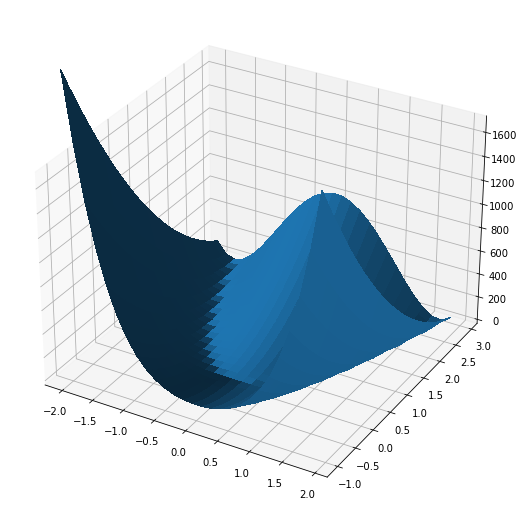

In [5]:
fig=plt.rcParams['figure.figsize']=(9,11)
ax=plt.axes(projection='3d')

# Evaluating the function
x = np.arange(-2, 2, 0.15)  #use linspace
#x=np.linspace(-10,10,20)
y = np.arange(-1, 3, 0.15)
x,y = np.meshgrid(x, y)
z = f(x,y)

# Plotting the graph
surf = ax.plot_surface(x, y, z, linewidth=0,  antialiased=False)
ax.set_zlim(0, 1700)
#fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()


**Derive the partial gradients.**

Partial gradients which is nothing but derivatives keeping one of the variables as constant is:

$\begin{matrix}
|\frac{\partial f}{\partial x}| \\
|\frac{\partial f}{\partial y}|
\end{matrix}  $

   

 $\frac{\partial f}{\partial x}=2(x-a)-4bx(y-x^{2})$  and $\frac{\partial f}{\partial y}=2b(y-x^{2})$

**3)Convert the function and gradient of this function into equivalent code representation.**

In [6]:
def rsb_grad(X, a=1, b=100):
    x, y = X
    return np.array([2 * (x - a) - 4 * b * x * (y - x**2),2 * b * (y - x**2)])

In [32]:
#I have taken 0.00001 as mu and max iterations as 5000

def GD(grad, x_i, mu=0.00001, epsilon=1e-5, max_iterations=5000):
    x = x_i
    iter_x, iter_y, iter_count = np.empty(0),np.empty(0), np.empty(0)
    
    for i in range(max_iterations):
        iter_x = np.append(iter_x,x[0])
        iter_y = np.append(iter_y,x[1])
        iter_count = np.append(iter_count ,i)  
        
        x = x - mu * grad(x)
        
        if np.linalg.norm(grad(x)) < epsilon:
            return x, i + 1
        
    return x,max_iterations,iter_x,iter_y
   

In [33]:
#They asked the starting point could be anything, so I am taken (5,-5) as my initial points

x_int=np.array([5,-5])
root,max_iter,iter_x,iter_y=GD(rsb_grad,x_int)
print(root, max_iter)


[0.06950544 0.00352037] 5000


In [34]:

anglesx = iter_x[1:] - iter_x[:-1]
anglesy = iter_y[1:] - iter_y[:-1]


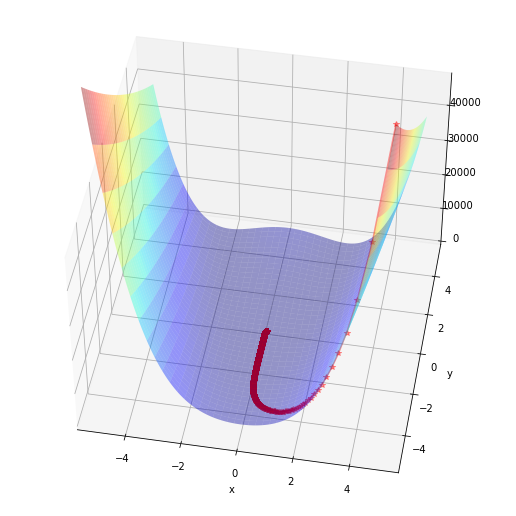

In [36]:
#Plot of the 3D Rosenrock function with the visualization of how the minima is reached with iterations

x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.plot(iter_x,iter_y, f(iter_x,iter_y),color = 'r', marker = '*', alpha = .4)
ax.set_zlim(0,48000)
ax.view_init(45, 280)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

Therefore, we can see that the rosenbrock function converges near (1,1), which is its global minimum but it is not exactly (1,1), which is mu opinion is because this is a peculiar function used to test the optimisations of various other possible functions. 

References:

https://people.bath.ac.uk/ps2106/files/courses/MA40050/2020/jupyter/Rosenbrock.html
https://xavierbourretsicotte.github.io/Intro_optimization.html

